# Apple Stock Data Ingestion & Feature Engineering

**Objective**: To build a reproducible pipeline that ingests, cleans, and engineers features on Apple (AAPL) stock data across multiple time intervals (daily, hourly, etc.) over the past 20 years. This dataset will serve as a foundation for future signal research and is designed as an academic showcase.


In [1]:
# Import libraries
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Pull 20 years of Apple daily stock data
ticker = "AAPL"
df_daily = yf.download(ticker, period="20y", interval="1d", auto_adjust=True)

# Preview
df_daily.tail()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2025-07-07,209.949997,216.229996,208.800003,212.679993,50229000
2025-07-08,210.009995,211.429993,208.449997,210.100006,42848900
2025-07-09,211.139999,211.330002,207.220001,209.529999,48749400
2025-07-10,212.410004,213.479996,210.029999,210.509995,44396500
2025-07-11,211.270004,211.354996,209.860001,210.565002,6417260


## Phase 4: Data Cleaning

In this section, we perform systematic cleaning on the raw Apple stock data. The goal is to prepare the dataset for accurate analysis and future signal research.

We will address the following:
1. **Null Values** – Check and handle missing observations (e.g., due to market holidays, partial trading days).
2. **Duplicate Rows** – Ensure no accidental duplication during ingestion.
3. **Outliers** – Visually and programmatically check for extreme values (e.g., price spikes due to data error).
4. **Trading Anomalies** – Detect suspiciously low volume or zero price activity that may indicate bad ticks.

Each cleaning step is modularized into a Python function in `src/data_cleaning.py`, and will be run in sequence on the raw dataset.


In [ ]:
def check_nulls(df):
    """Returns rows with any missing values."""
    return df[df.isnull().any(axis=1)]

def drop_nulls(df):
    """Drops rows with any missing values."""
    return df.dropna()

def check_duplicates(df):
    """Returns duplicated rows."""
    return df[df.duplicated()]

def drop_duplicates(df):
    """Drops duplicated rows."""
    return df.drop_duplicates()

def detect_outliers_iqr(df, column, factor=1.5):
    """Detects outliers using the IQR method for a given column."""
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - factor * iqr
    upper = q3 + factor * iqr
    return df[(df[column] < lower) | (df[column] > upper)]

def plot_price_volume(df, ticker="AAPL"):
    """Plots price and volume over time."""
    fig, ax1 = plt.subplots(figsize=(14, 6))

    ax1.set_title(f"{ticker} Adjusted Close and Volume Over Time")
    ax1.plot(df.index, df["Close"], color="blue", label="Adj Close")
    ax1.set_ylabel("Price", color="blue")

    ax2 = ax1.twinx()
    ax2.plot(df.index, df["Volume"], color="orange", alpha=0.3, label="Volume")
    ax2.set_ylabel("Volume", color="orange")

    fig.tight_layout()
    plt.show()

def flag_suspicious_trading_days(df):
    """Flags trading days with 0 or extremely low volume, or 0 prices."""
    return df[(df["Volume"] == 0) | (df["Close"] == 0)]

def clean_stock_data(df):
    """Runs all cleaning steps on the dataframe."""
    df = drop_nulls(df)
    df = drop_duplicates(df)
    df = df[df["Volume"] > 0]       # remove zero-volume days
    df = df[df["Close"] > 0]        # remove zero-price days
    return df

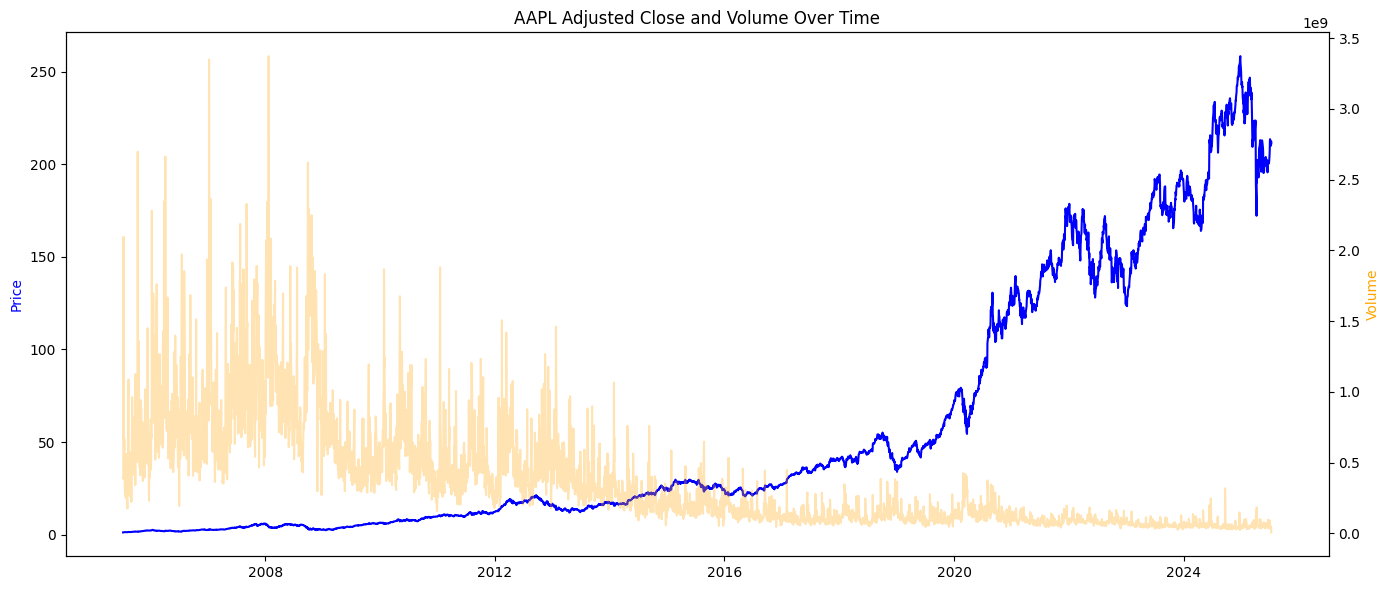

Nulls:
Empty DataFrame
Columns: [(Close, AAPL), (High, AAPL), (Low, AAPL), (Open, AAPL), (Volume, AAPL)]
Index: []
Duplicates:
Empty DataFrame
Columns: [(Close, AAPL), (High, AAPL), (Low, AAPL), (Open, AAPL), (Volume, AAPL)]
Index: []
Suspicious trading days:
Price      Close High  Low Open Volume
Ticker      AAPL AAPL AAPL AAPL   AAPL
Date                                  
2005-07-11   NaN  NaN  NaN  NaN    NaN
2005-07-12   NaN  NaN  NaN  NaN    NaN
2005-07-13   NaN  NaN  NaN  NaN    NaN
2005-07-14   NaN  NaN  NaN  NaN    NaN
2005-07-15   NaN  NaN  NaN  NaN    NaN
...          ...  ...  ...  ...    ...
2025-07-07   NaN  NaN  NaN  NaN    NaN
2025-07-08   NaN  NaN  NaN  NaN    NaN
2025-07-09   NaN  NaN  NaN  NaN    NaN
2025-07-10   NaN  NaN  NaN  NaN    NaN
2025-07-11   NaN  NaN  NaN  NaN    NaN

[5033 rows x 5 columns]


In [5]:
# Visual inspection first
plot_price_volume(df_daily)

# Run through cleaning steps
print("Nulls:")
print(check_nulls(df_daily))

print("Duplicates:")
print(check_duplicates(df_daily))

print("Suspicious trading days:")
print(flag_suspicious_trading_days(df_daily))

# Clean it
df_daily_clean = clean_stock_data(df_daily)